The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

# importing the modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Dataset

In [36]:
df=pd.read_csv("Iris.csv")

In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
#id is not used for any model training so we can delete the column
df=df.drop(columns=['Id'])

In [39]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
# count of each species present 
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data preprocessing

In [43]:
#checking whether the dataset have empty values or not
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

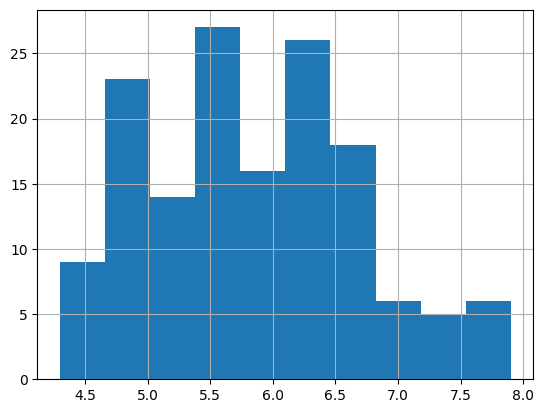

In [44]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

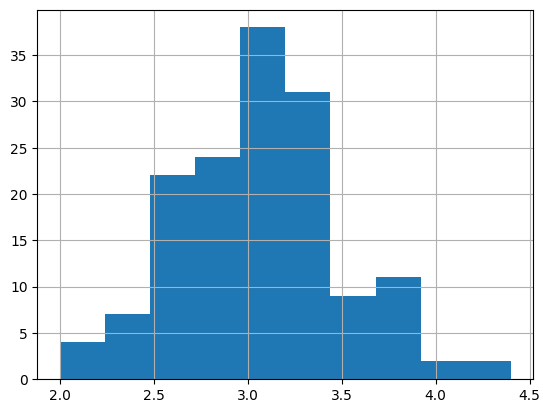

In [45]:
df['SepalWidthCm'].hist()

the above distribution is normal as it have a bell kind of shape

the model can quicly learn from data

<AxesSubplot:>

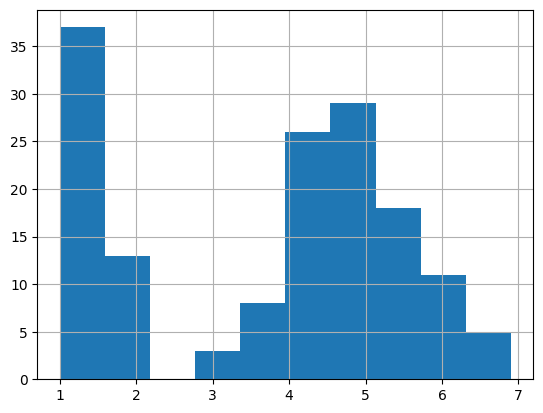

In [46]:
df['PetalLengthCm'].hist()

the insights which we get from this is that the one class is seperated from others


<AxesSubplot:>

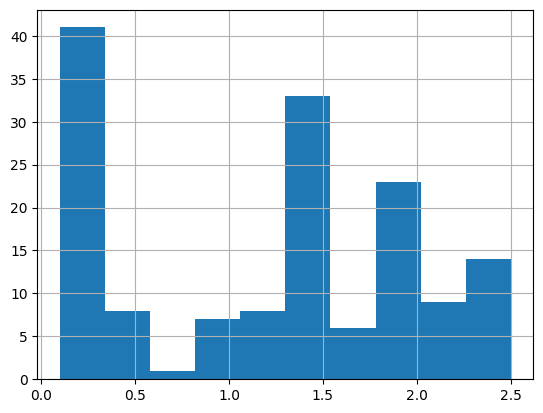

In [47]:
df['PetalWidthCm'].hist()

the insights which we get from this is that the one class is seperated from others

In [48]:
# scatter plot
colors=['red','yellow','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

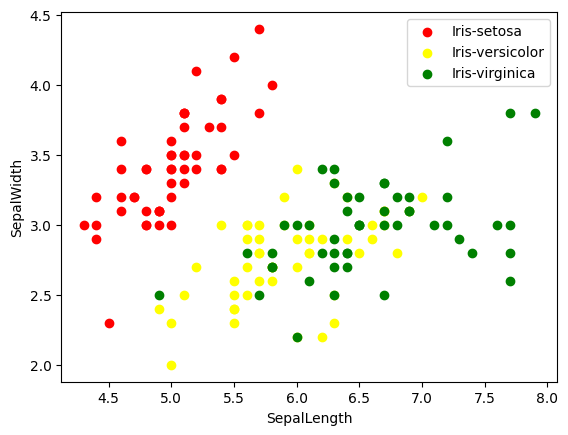

In [49]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i], label=species[i])
plt.ylabel("SepalWidth")
plt.xlabel('SepalLength')
plt.legend()

iris-setosa is seperated from the other if we compare with respect to sepal

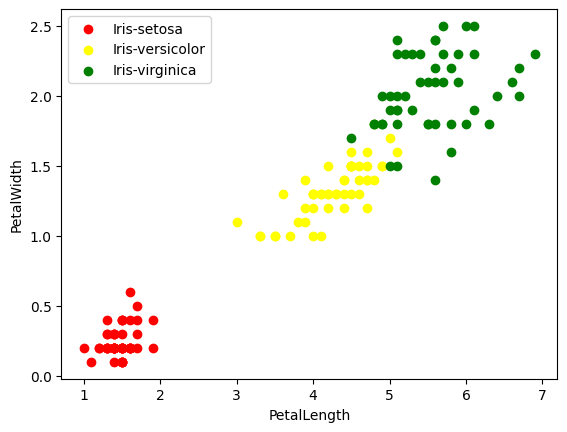

In [50]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i], label=species[i])
plt.ylabel("PetalWidth")
plt.xlabel('PetalLength')
plt.legend()

iris-setosa is seperated from the other if we compare with respect to petal

clearly iris-setosa is a differnt class subject to prtal and sepal

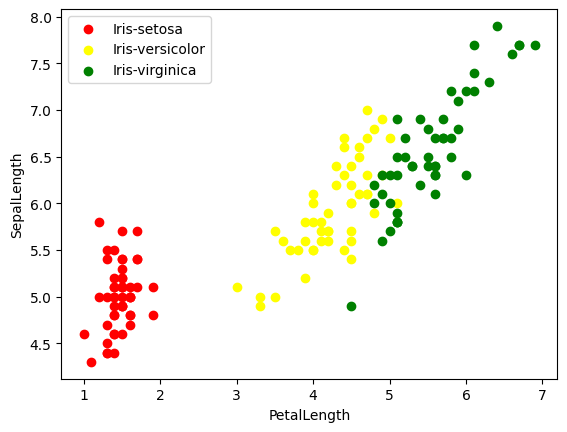

In [51]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalLengthCm'],c = colors[i], label=species[i])
plt.ylabel("SepalLength")
plt.xlabel('PetalLength')
plt.legend()

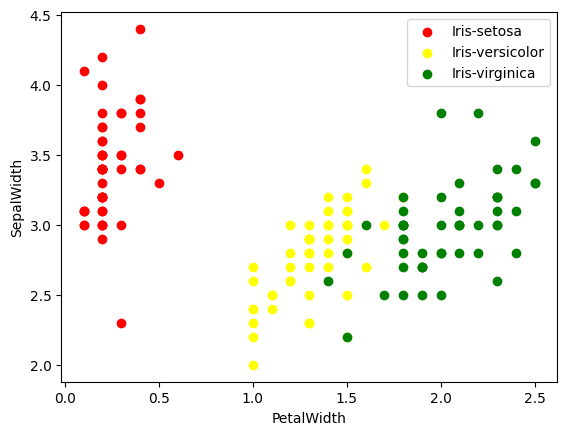

In [52]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalWidthCm'],c = colors[i], label=species[i])
plt.ylabel("SepalWidth")
plt.xlabel('PetalWidth')
plt.legend()

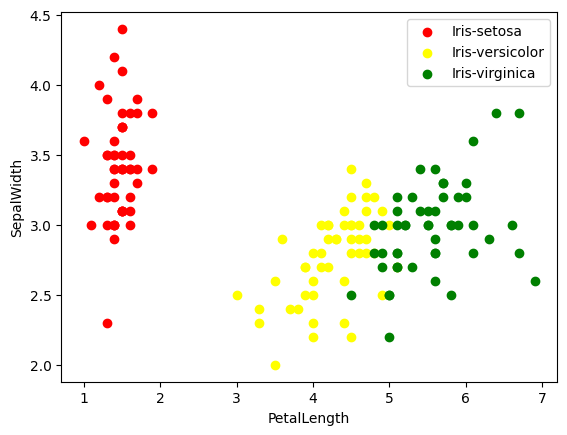

In [53]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalWidthCm'],c = colors[i], label=species[i])
plt.ylabel("SepalWidth")
plt.xlabel('PetalLength')
plt.legend()

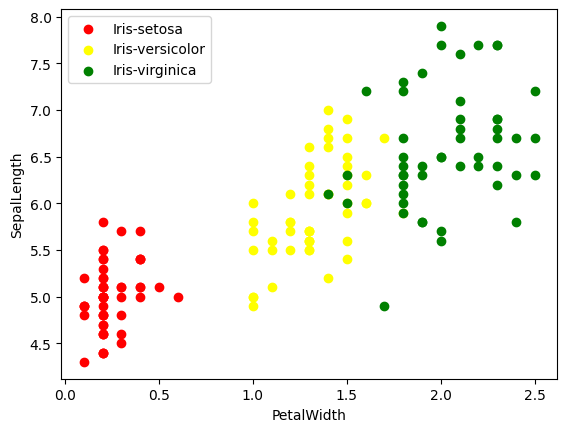

In [54]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalLengthCm'],c = colors[i], label=species[i])
plt.ylabel("SepalLength")
plt.xlabel('PetalWidth')
plt.legend()

# Correlation matrix

A correlationmatrix is a table showing correltaion between variables.
The value lie in range of -1 to 1
if the correlation b/w them is high we can neglect one of them for model training and this process reduces the features

<AxesSubplot:>

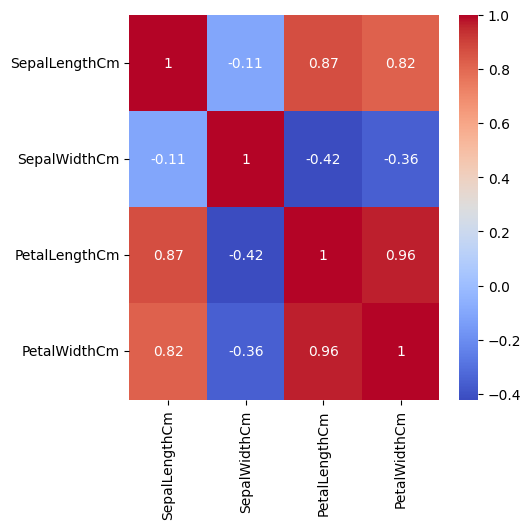

In [55]:
corr=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label encoder

Machine can understand the numeric form sometimes dataset contains multiple string value 
we have to convert them in integer using label encode
for ex: in this dataset species column contain string/object datatype

In [56]:
## label encoding to convert the se,embarked in some integers
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()
#df['Species']=le.fit_transform((df['Species']))


In [57]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
from sklearn.model_selection import train_test_split,cross_val_score

In [59]:
#train - 70%
#test -30%
X=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [60]:
#classify column
def classify(model):
    model.fit(x_train,y_train)
    print("Acuracy : ", model.score(x_test,y_test))
    score=cross_val_score(model,X,y, cv=5)
    
    print("CV_score : ",np.mean(score))

In [61]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Acuracy :  0.9333333333333333
CV_score :  0.9600000000000002


In [62]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Acuracy :  0.9333333333333333
CV_score :  0.96


In [63]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classify(model)

Acuracy :  0.9333333333333333
CV_score :  0.9733333333333334


# PICKLING THE MODEL FOR DEPLOYMENT

In [64]:
# we use k-nearest neighbour for our model as it is giving best accuracy
import pickle
file_name='saved_iris_model.sav'
pickle.dump(model, open(file_name,'wb'))

In [65]:
load_model=pickle.load( open(file_name,'rb'))

In [66]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
x=load_model.predict([[5.1,3.5,1.4,0.2]])

In [68]:
x

array(['Iris-setosa'], dtype=object)